## Diamond price prediciton 2024

### Description:

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

### Content:

price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond color, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of the top of diamond relative to widest point (43--95)

### Evaluation:

Evaluation Metric

The evaluation metric for this competition is Root Mean Squared Error (RMSE). The RMSE is a commonly used measure of the differences between predicted values provided by a model and the actual observed values. Submission Format For every diamond (i.e. row) in the test dataset (test.csv), submission files should contain two columns: id and price. id should be an integer and price should be a real value. For each row, these two values should be separated by a comma. The file should contain a header and have the following format ``` Id,price 597,2838 ```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('train.csv',index_col=0)
train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
Id,,,,,,,,,,
1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [3]:
test=pd.read_csv('test.csv',index_col=0)
test.head()

,carat,cut,color,clarity,depth,table,x,y,z
Id,,,,,,,,,
1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43152 entries, 1 to 43152
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  int64  
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.6+ MB


Good! it seems there is no missing values

In [5]:
train.describe()

,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Let's check for null values

In [6]:
train.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

It seems there is no null values. Now let's check duplicates

In [7]:
len(train)

43152

In [8]:
unique=train.drop_duplicates()

In [9]:
len(unique)

43055

In [10]:
# let's see what rows were dropped

dropped=[ind for ind in train.index if ind not in unique.index]

In [11]:
len(dropped)

97

In [12]:
train.iloc[dropped]

,carat,cut,color,clarity,depth,table,price,x,y,z
Id,,,,,,,,,,
5430,1.21,Very Good,J,VS2,62.4,58.0,4191,6.79,6.83,4.25
6706,0.41,Ideal,H,SI1,62.8,56.0,876,4.77,4.72,2.98
7725,0.42,Ideal,D,VS2,61.8,56.0,1031,4.80,4.84,2.98
11091,0.30,Very Good,J,VS1,62.4,58.0,394,4.26,4.30,2.67
11336,0.30,Ideal,E,VS2,62.3,57.0,844,4.32,4.29,2.68
...,...,...,...,...,...,...,...,...,...,...
41650,0.33,Premium,E,VVS2,61.3,59.0,741,4.44,4.47,2.73
41777,2.12,Very Good,F,SI2,60.6,58.0,17694,8.27,8.32,5.03
42167,0.32,Ideal,D,SI1,62.9,56.0,706,4.40,4.38,2.76


In [13]:
# let's check unique values of 'clarity' column
unique['clarity'].value_counts()

clarity
SI1     10406
VS2      9806
SI2      7403
VS1      6465
VVS2     4031
VVS1     2899
IF       1440
I1        605
Name: count, dtype: int64

In [14]:
# let's check unique values of 'cut' column
unique['cut'].value_counts()

cut
Ideal        17161
Premium      11080
Very Good     9651
Good          3874
Fair          1289
Name: count, dtype: int64

In [15]:
# let's check unique values of 'color' column
unique['color'].value_counts()

color
G    9042
E    7817
F    7616
H    6629
D    5411
I    4254
J    2286
Name: count, dtype: int64

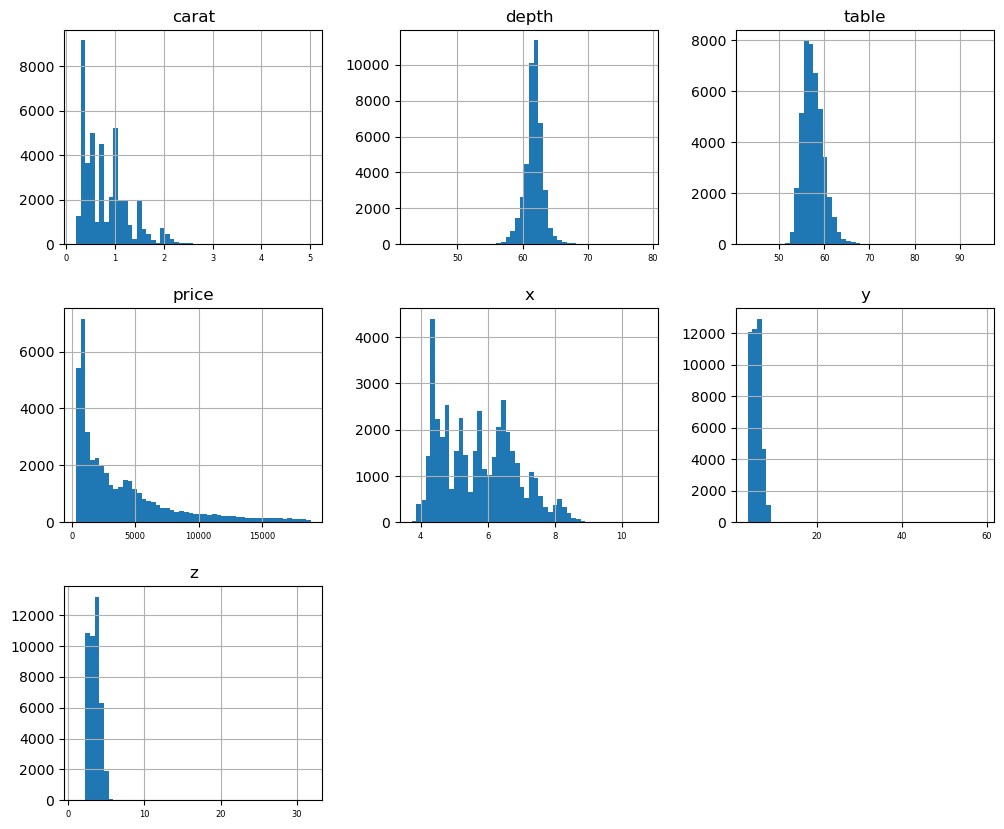

In [54]:
# plot histograms for numerical columns

# drop ID column

unique.drop('Id', axis=1,inplace=True)

unique.hist(figsize=(12,10), bins=50,xlabelsize=6);

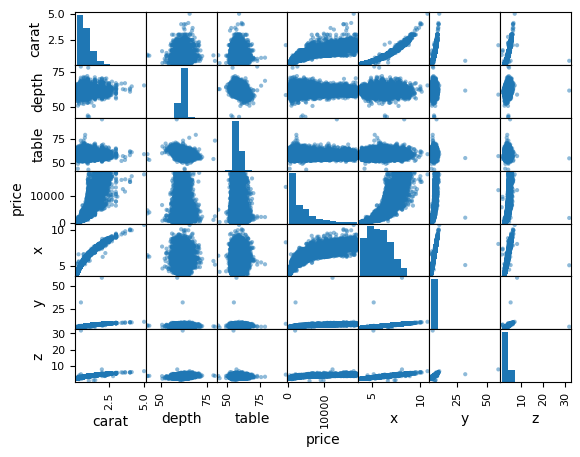

In [56]:
# Plot scatter matrix
from pandas.plotting import scatter_matrix

scatter_matrix(unique);

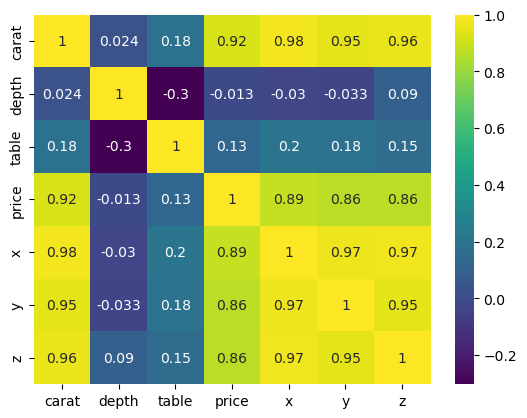

In [58]:
# plot heatmap for numerical columns

sns.heatmap(unique.corr(numeric_only=True),annot=True,cmap='viridis');

In [16]:
# it was noticed from the describe method that some values in x,y,z columns are 0. let's check them
xzero=unique[unique['x']==0]
yzero=unique[unique['y']==0]
zzero=unique[unique['z']==0]
print(len(xzero),len(yzero),len(zzero) )

5 4 17


In [17]:
print(len(zzero[zzero['x']==0]))
print(len(zzero[zzero['y']==0]))

5
4


It's not logic to have 0 value in the dimension column. let's replace 0 with another value. We can replace it with the median value.


In [18]:
stat=unique[['cut','color','clarity','x','y','z']]
stat.head(1)

,cut,color,clarity,x,y,z
Id,,,,,,
1,Ideal,I,SI2,6.57,6.6,4.07


In [19]:
# calculate the median value for columns x,y and z based on categorical columns
pvt=pd.pivot_table(data=stat,index='clarity',columns=['color','cut'],aggfunc='median',dropna=True)
pvt.head(1)

x                                                            \
color        D                                     E                       
cut       Fair   Good  Ideal Premium Very Good  Fair  Good Ideal Premium   
clarity                                                                    
I1       7.325  5.435  5.955    6.63      6.18  6.18  6.87  6.43    6.52   

                   ...    z                                                   \
color              ...    I                                   J                
cut     Very Good  ... Fair  Good Ideal Premium Very Good  Fair  Good  Ideal   
clarity            ...                                                         
I1          6.475  ...  4.3  4.02  3.98   4.345      4.91  5.12  3.88  4.875   

                           
color                      
cut     Premium Very Good  
clarity                    
I1         4.13     4.595  

[1 rows x 105 columns]

In [20]:
def replace_median(df, pvt, col):
    """Takes in a df, replaces 0 values with the median corresponding to categorical values of this obsrevation"""
    for index, row in df.iterrows():
        if row[col] == 0:
            clrty = row['clarity']
            cut = row['cut']
            color = row['color']
            median_val = pvt.loc[clrty, (col, color, cut)]
            df.at[index, col] = median_val
    return df

In [21]:
# now replace the zeros with medians,

unique=replace_median(unique,pvt,'x')
unique=replace_median(unique,pvt,'y')
unique=replace_median(unique,pvt,'z')
unique.head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
Id,,,,,,,,,,
1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.6,4.07


In [22]:
# reset index
unique.reset_index(inplace=True)

In [23]:
# Let's change categorical columns to numerical using encoding, noting that both 'cut' and 'clarity' has ordinal data, 
# while 'color' has categorical data. We can use ordinal encoding on ordinal data and one hot encoding on categorical data.

# Let's split the dataset into 3 datasets. One categorical column "Color" and numerical columns, and apply encoding on categorical columns

categ=unique['color']
ordin=unique[['cut', 'clarity']]
numer=unique.drop(columns=['color', 'cut', 'clarity'],axis=1)

In [24]:
# define categories ordering, giving the best values highest numbers

cut = ['Fair', 'Good', 'Very Good', 'Premium','Ideal']

clar=  ['I1','SI2','SI1','VS2', 'VS1','VVS2','VVS1','IF']

tiers = [cut,clar]

In [25]:
# encode ordinal data

from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder(categories=tiers)

In [26]:
encoded1 = enc.fit_transform(ordin)
enc_co=pd.DataFrame(encoded1,columns=ordin.columns)

In [27]:
# encode categorical column

from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder()

In [29]:
onehot = ohe.fit_transform(categ.values.reshape(-1, 1))

In [30]:
res=onehot.toarray()
res

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
ordin=pd.DataFrame(res,columns=ohe.get_feature_names_out())
ordin.head(2)

,x0_D,x0_E,x0_F,x0_G,x0_H,x0_I,x0_J
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [32]:
# Merge back all columns

df=pd.concat([numer,enc_co,ordin],axis=1)
df

,Id,carat,depth,table,price,x,y,z,cut,clarity,x0_D,x0_E,x0_F,x0_G,x0_H,x0_I,x0_J
0,1,1.06,61.8,57.0,4270,6.57,6.60,4.07,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,1.51,60.9,58.0,15164,7.38,7.42,4.51,3.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,0.32,61.3,56.0,828,4.43,4.41,2.71,4.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,0.53,61.2,56.0,1577,5.19,5.22,3.19,4.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5,0.70,61.0,57.0,2596,5.76,5.72,3.50,3.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43050,43148,0.52,61.5,56.0,1760,5.16,5.18,3.18,4.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
43051,43149,0.72,62.1,59.0,3016,5.70,5.73,3.55,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
43052,43150,0.44,61.5,58.0,990,4.95,4.87,3.02,3.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
43053,43151,0.31,60.2,58.0,734,4.38,4.43,2.65,3.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# check the distribution of numerical columns and correlation between columns
#sns.pairplot(data=unique);

In [51]:
# Now we need to scale our data since there are variations in the range of values, let's use standardscalar

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# let's first drop the target column "Price"
df1=df.drop(['price'],axis=1)
df1.head()

,Id,carat,depth,table,x,y,z,cut,clarity,x0_D,x0_E,x0_F,x0_G,x0_H,x0_I,x0_J
0,1,1.06,61.8,57.0,6.57,6.60,4.07,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,1.51,60.9,58.0,7.38,7.42,4.51,3.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,0.32,61.3,56.0,4.43,4.41,2.71,4.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,0.53,61.2,56.0,5.19,5.22,3.19,4.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5,0.70,61.0,57.0,5.76,5.72,3.50,3.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [50]:
# apply the scalar

df2 = scaler.fit_transform(df1)
df2

array([[ 0.55420965,  0.03736927, -0.20579065, ..., -0.42659746,
         3.02010969, -0.2367953 ],
       [ 1.50519776, -0.58978672,  0.24177693, ..., -0.42659746,
        -0.3311138 , -0.2367953 ],
       [-1.00963748, -0.31105073, -0.65335824, ..., -0.42659746,
        -0.3311138 , -0.2367953 ],
       ...,
       [-0.75604064, -0.17168273,  0.24177693, ..., -0.42659746,
         3.02010969, -0.2367953 ],
       [-1.03077054, -1.07757471,  0.24177693, ..., -0.42659746,
        -0.3311138 , -0.2367953 ],
       [-0.98850441, -0.38073472, -1.10092582, ..., -0.42659746,
        -0.3311138 , -0.2367953 ]])

In [37]:
df3=pd.DataFrame(df2, columns=df1.columns)
df3.head()

,Id,carat,depth,table,x,y,z,cut,clarity,x0_D,x0_E,x0_F,x0_G,x0_H,x0_I,x0_J
0,-1.730702,0.554210,0.037369,-0.205791,0.748611,0.753541,0.752223,0.982457,-1.240321,-0.379132,-0.470993,-0.463578,-0.515596,-0.426597,3.020110,-0.236795
1,-1.730622,1.505198,-0.589787,0.241777,1.472450,1.468412,1.376808,0.085517,1.185197,-0.379132,-0.470993,-0.463578,1.939502,-0.426597,-0.331114,-0.236795
2,-1.730541,-1.009637,-0.311051,-0.653358,-1.163751,-1.155687,-1.178313,0.982457,-0.027562,-0.379132,-0.470993,2.157135,-0.515596,-0.426597,-0.331114,-0.236795
3,-1.730461,-0.565843,-0.380735,-0.653358,-0.484594,-0.449534,-0.496948,0.982457,-0.027562,-0.379132,-0.470993,-0.463578,1.939502,-0.426597,-0.331114,-0.236795
4,-1.730381,-0.206581,-0.520103,-0.205791,0.024773,-0.013637,-0.056899,0.085517,1.185197,-0.379132,-0.470993,-0.463578,-0.515596,2.344130,-0.331114,-0.236795


In [38]:
# Now our data is ready for modelling
# split into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df3, unique['price'], test_size=0.33, random_state=42)


In [39]:
# Use Random forrest regressor, and gridsearch to get the best parameters

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

In [40]:
# use gridsearch

from sklearn.model_selection import GridSearchCV

param_grid ={'n_estimators': [100, 150, 200, 250, 300],'max_depth': [1,2,3,4]}

In [42]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=3,scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 150, 200, 250, 300]},
             scoring='neg_root_mean_squared_error')

In [43]:
grid_search.best_params_

{'max_depth': 4, 'n_estimators': 300}

In [44]:
grid_search.best_score_

-1108.066453190563

In [45]:
# Evaluate model on test set

final_model = grid_search.best_estimator_
final_model

RandomForestRegressor(max_depth=4, n_estimators=300)

In [47]:
from sklearn.metrics import mean_squared_error

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)

print(final_rmse)

1097.7393784711235
